# Cargar recursos

In [ ]:
#Cargar recursos y preparar entorno
#En esta sección se configuran los recursos iniciales para el trabajo, incluyendo autenticación con Kaggle y descarga de datos.

#archivo de inicialización desde el repositorio del curso
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
# Cargar archivo kaggle.json para autenticarse

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santiago887r","key":"b0e51fcda78bbc6c00e00839ee80ec77"}'}

In [ ]:
# Aqui se configuran los permisos de Kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.17GB/s]


In [ ]:

!unzip udea*.zip > /dev/null

In [ ]:
# Ver cuántos datos hay en cada archivo

!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [ ]:
# Carga de datos
# aqui se carga el conjunto de entrenamiento y se realiza una primera exploración para poder entender su estructura.


import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [ ]:

import matplotlib.pyplot as plt

In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# Preprocesado de datos
En base a la exploracion de los datos, escogi trabajar con las siguientes columnas:

-ESTU_VALORMATRICULAUNIVERSIDAD

-ESTU_HORASSEMANATRABAJA

-FAMI_ESTRATOVIVIENDA

-FAMI_TIENEINTERNET

RENDIMIENTO_GLOBAL

In [ ]:
# Preprocesamiento de datos
# en esta parte se seleccionan y agrupan las variables de interés y se manejan valores nulos.


datos = z[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'RENDIMIENTO_GLOBAL' ]]    # Selección de columnas que son relevantes para el análisis
datos.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,medio-alto
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,bajo
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,bajo
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,alto
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,medio-bajo


Limpieza de datos nulos

In [ ]:
sum(datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datos.ESTU_HORASSEMANATRABAJA.isna()), sum(datos.FAMI_ESTRATOVIVIENDA.isna()), sum(datos.FAMI_TIENEINTERNET.isna()) # Revisar valores nulos en cada variable

(6287, 30857, 32137, 26629)

In [ ]:
# Aca se remplazan los valores nulos por 'no info' en variables categóricas

datos.ESTU_VALORMATRICULAUNIVERSIDAD.values[datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
datos.ESTU_HORASSEMANATRABAJA.values[datos.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
datos.FAMI_ESTRATOVIVIENDA.values[datos.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
datos.FAMI_TIENEINTERNET.values[datos.FAMI_TIENEINTERNET.isna()] = 'no info'
sum(datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datos.ESTU_HORASSEMANATRABAJA.isna()), sum(datos.FAMI_ESTRATOVIVIENDA.isna()), sum(datos.FAMI_TIENEINTERNET.isna())

(0, 0, 0, 0)

Limpieza de ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
#La variable `ESTU_VALORMATRICULAUNIVERSIDAD` contiene rangos de valores en texto y para que nos sea útil en el modelo predictivo, se convierte a valores numéricos aproximados en millones de pesos colombianos.
#Además, se agrega la categoría `'no info'` con un valor de `-1` para representar registros con información faltante.

# Diccionario que mapea los rangos de matrícula a valores numéricos en millones
vmat = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': 0.25,
 'Entre 500 mil y menos de 1 millón': 0.75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1} # valor artificial para representar datos faltantes

datos.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmat[i] for i in datos.ESTU_VALORMATRICULAUNIVERSIDAD]]
datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts() # Verificar la distribución de los nuevos valores

/tmp/ipython-input-12-2905707688.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmat[i] for i in datos.ESTU_VALORMATRICULAUNIVERSIDAD]]


,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


Limpieza de ESTU_HORASSEMANATRABAJA


In [ ]:
#Esta variable representa cuántas horas semanales trabaja el estudiante. Los valores nulos fueron reemplazados por 0, asumiendo que el estudiante no trabaja o que no hay información registrada.

htra = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    'no info': -1}

datos.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datos.ESTU_HORASSEMANATRABAJA]]
datos.ESTU_HORASSEMANATRABAJA.value_counts() # Ver resumen estadístico

/tmp/ipython-input-13-3519328184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datos.ESTU_HORASSEMANATRABAJA]]


,count
ESTU_HORASSEMANATRABAJA,
35,249352
0,116550
15,115857
25,92693
5,87191
-1,30857


Limpieza de FAMI_ESTRATOVIVIENDA

In [ ]:
#Indica el estrato de la vivienda del estudiante. Es una variable categórica y Los valores nulos fueron reemplazados por `'no info'`.

# Reemplazar la categoría 'Sin Estrato' por 'no info'
datos.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datos.FAMI_ESTRATOVIVIENDA.values]

/tmp/ipython-input-14-340873352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datos.FAMI_ESTRATOVIVIENDA.values]


In [ ]:
datos.FAMI_ESTRATOVIVIENDA.value_counts() # Verificar distribución de categorías

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
no info,35426
Estrato 5,23608
Estrato 6,12605


In [ ]:
# En esta parte se creo el diccionario de mapeo, cada estrato textual a número entero
estra = {'Estrato 1': 1,
 'Estrato 2': 2,
 'Estrato 3': 3,
 'Estrato 4': 4,
 'Estrato 5': 5,
 'Estrato 6': 6,
 'no info': -1}

datos.FAMI_ESTRATOVIVIENDA = np.r_[[estra[i] for i in datos.FAMI_ESTRATOVIVIENDA]]
datos.FAMI_ESTRATOVIVIENDA.value_counts()  # Revisar distribución

/tmp/ipython-input-16-575857420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.FAMI_ESTRATOVIVIENDA = np.r_[[estra[i] for i in datos.FAMI_ESTRATOVIVIENDA]]


,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,35426
5,23608
6,12605


Limpieza de FAMI_TIENEINTERNET

In [ ]:
#Esta variable representa si el hogar tiene o no conexión a internet. Dado que es una variable categórica con tres posibles valores (`'Sí'`, `'No'` y `'no info'`), lo que hicimos fue codificar mediante **one-hot encoding** para permitir que los modelos trabajen con estos datos sin imponer un orden.


x = datos.FAMI_TIENEINTERNET.values
FAMI_TIENEINTERNET_vals = sorted(np.unique(x)) # Se ordenan y listan las categorías
FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)} # Se crea un diccionario que asigna un vector one-hot a cada valor
FAMI_TIENEINTERNET_onehot_vals # Mostrar el diccionario creado

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
# Reemplazar los valores de la columna con sus vectores one-hot
FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in datos.FAMI_TIENEINTERNET]]
FAMI_TIENEINTERNET_onehot_enc # para visualizar la codificación resultante

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])
FAMI_TIENEINTERNET_df # Ver el DataFrame generado

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,1.0,0.0,0.0


In [ ]:
datos = pd.concat([FAMI_TIENEINTERNET_df, datos], axis=1).drop('FAMI_TIENEINTERNET', axis=1) # Se integraron las columnas codificadas al DataFrame original y se eliminaron las columnas categóricas
datos.shape # Verificar nueva forma del DataFrame

(692500, 7)

In [ ]:
datos.head() # para verificar solo las primeras filas

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,6.25,5,3,medio-alto
1,1.0,0.0,0.0,3.25,0,3,bajo
2,0.0,1.0,0.0,3.25,35,3,bajo
3,0.0,1.0,0.0,4.75,0,4,alto
4,0.0,1.0,0.0,3.25,25,3,medio-bajo


Limpieza de RENDIMIENTO_GLOBAL

In [ ]:
#La variable `RENDIMIENTO_GLOBAL` es la variable objetivo del modelo, originalmente categórica. Se convierte a valores numéricos para facilitar su uso en algoritmos de clasificación.


# Nombre de la variable objetivo
y = 'RENDIMIENTO_GLOBAL'


# Diccionario de codificación
rg = { 'bajo':0, 'medio-bajo':1, 'medio-alto':2, 'alto': 3}
datos[y] = [rg[i] for i in datos[y]] # Reemplazar los valores categóricos por sus equivalentes numéricos

# Datos preprocesados

In [ ]:
datos.head() #Visuaizar primeras filas

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,6.25,5,3,2
1,1.0,0.0,0.0,3.25,0,3,0
2,0.0,1.0,0.0,3.25,35,3,0
3,0.0,1.0,0.0,4.75,0,4,3
4,0.0,1.0,0.0,3.25,25,3,1


# Construcción del modelo

In [ ]:
#Se separaronn las variables independientes X de la variable dependiente (`Y`, que representa el `RENDIMIENTO_GLOBAL`) para entrenar el modelo.

datos = datos[sorted(datos.columns)]

X = datos[[c for c in datos.columns if c!=y]].values
Y = datos[y].values
X.shape, Y.shape

((692500, 6), (692500,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Se uso la función `train_test_split` para dividir el conjunto de datos en dos subconjuntos:
#- 80% para entrenamiento (`Xtr`, `ytr`)
#- 20% para prueba o validación (`Xts`, `yts`)

Xtr, Xts, ytr, yts = train_test_split(X,Y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 6), (138500, 6), (554000,), (138500,))

In [ ]:
from sklearn.linear_model import LogisticRegression  # Para entrenar modelo de Regresión Logística

lr = LogisticRegression()
lr.fit(Xtr, ytr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predicciones sobre los datos de entrenamiento y prueba
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

In [ ]:
print (preds_tr[:10])
print (preds_ts[:10])

[3 0 3 0 3 3 0 1 3 0]
[0 3 0 1 0 0 3 0 3 2]


Accuracy

In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(np.float64(0.34673104693140794), np.float64(0.34896750902527074))

Matriz de confusion

In [ ]:
# Importar librerías para matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
cm_tr = confusion_matrix(ytr, preds_tr) # Calcular matrices de confusión para entrenamiento y prueba
cm_ts = confusion_matrix(yts, preds_ts)

# Se normaliza por filas para obtener proporciones
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

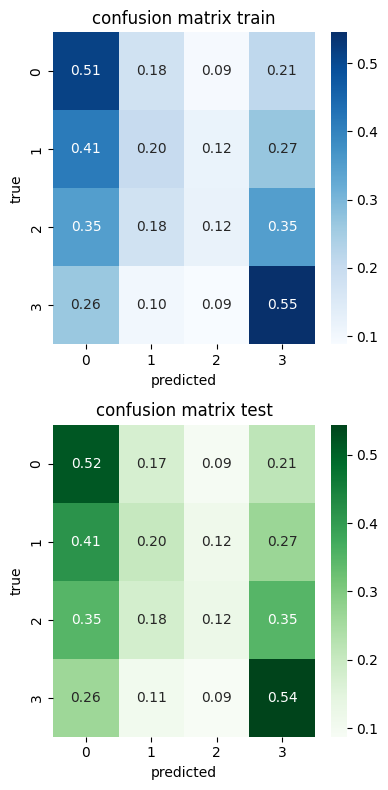

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2, 1, figsize=(4, 8))

for i, ax in enumerate(axs):
    if i == 0: # Heatmap de la matriz de confusión normalizada (la de entrenamiento)
        sns.heatmap(cm_tr, annot=True, ax=ax, fmt=".2f", cmap="Blues")
        ax.set_title("confusion matrix train")
    if i == 1:  # Heatmap de la matriz de confusión normalizada (de prueba)
        sns.heatmap(cm_ts, annot=True, ax=ax, fmt=".2f", cmap="Greens")
        ax.set_title("confusion matrix test")
    ax.set_ylabel("true")
    ax.set_xlabel("predicted")

plt.tight_layout() # Ajuste del layout para evitar solapamiento
plt.show()

# Aplicar modelo al test.csv

In [ ]:
datost = pd.read_csv("test.csv")  # Cargar datos de prueba para predicción
datost # primeras filas del dataset

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260


In [ ]:
#Se seleccionan las columnas que fueron utilizadas en el modelo entrenado. También se extrae el `ID` de cada registro para generar el archivo `submission.csv`.

datost_ids = datost['ID'].values

# Seleccionar las mismas variables que se usaron en entrenamiento
datost = datost[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']]
print ("shape of loaded dataframe", datost.shape)
datost.head() # Confirmar tamaño y vista preliminar del conjunto de prueba

shape of loaded dataframe (296786, 4)


,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
0,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si
1,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si
2,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si
3,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No
4,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si


Preprocesado aplicado a test.csv

In [ ]:
#Se aplica el mismo proceso de limpieza y transformación utilizado en el conjunto de entrenamiento

# Revisión de valores nulos por variable
sum(datost.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datost.ESTU_HORASSEMANATRABAJA.isna()), sum(datost.FAMI_ESTRATOVIVIENDA.isna()), sum(datost.FAMI_TIENEINTERNET.isna())

(2723, 13379, 13795, 11539)

In [ ]:
# Reemplazo de nulos con estrategias coherentes al entrenamiento

datost.ESTU_VALORMATRICULAUNIVERSIDAD.values[datost.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
datost.ESTU_HORASSEMANATRABAJA.values[datost.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
datost.FAMI_ESTRATOVIVIENDA.values[datost.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
datost.FAMI_TIENEINTERNET.values[datost.FAMI_TIENEINTERNET.isna()] = 'no info'

# Confirmamos que ya no hay nulos
sum(datost.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datost.ESTU_HORASSEMANATRABAJA.isna()), sum(datost.FAMI_ESTRATOVIVIENDA.isna()), sum(datost.FAMI_TIENEINTERNET.isna())

(0, 0, 0, 0)

In [ ]:
# Diccionario de conversión para matrícula
vmatricula = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': 0.25,
 'Entre 500 mil y menos de 1 millón': 0.75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

datost.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmatricula[i] for i in datost.ESTU_VALORMATRICULAUNIVERSIDAD]] # transformación a numérico
datost.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts() # Verificamos distribución

/tmp/ipython-input-49-125618971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmatricula[i] for i in datost.ESTU_VALORMATRICULAUNIVERSIDAD]]


,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,86923
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320
-1.00,2723


In [ ]:
# Diccionario de codificación para rangos de horas
htra = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    'no info': -1}

datost.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datost.ESTU_HORASSEMANATRABAJA]] # Aplicar transformación
datost.ESTU_HORASSEMANATRABAJA.value_counts() # Verificar la distribución transformada

/tmp/ipython-input-50-2304656336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datost.ESTU_HORASSEMANATRABAJA]]


,count
ESTU_HORASSEMANATRABAJA,
35,106189
0,50422
15,49386
25,39931
5,37479
-1,13379


In [ ]:
datost.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datost.FAMI_ESTRATOVIVIENDA.values] # Reemplazo de 'Sin Estrato' por 'no info' usando loc para evitar el warning

/tmp/ipython-input-51-572514100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datost.FAMI_ESTRATOVIVIENDA.values]


In [ ]:
datost.FAMI_ESTRATOVIVIENDA.value_counts() # Confirmar los valores resultantes

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,99288
Estrato 3,90719
Estrato 1,48092
Estrato 4,27823
no info,15219
Estrato 5,10194
Estrato 6,5451


In [ ]:
# Diccionario de conversión de estrato
estrato = {'Estrato 1': 1,
 'Estrato 2': 2,
 'Estrato 3': 3,
 'Estrato 4': 4,
 'Estrato 5': 5,
 'Estrato 6': 6,
 'no info': -1}

datost.FAMI_ESTRATOVIVIENDA = np.r_[[estrato[i] for i in datost.FAMI_ESTRATOVIVIENDA]]
datost.FAMI_ESTRATOVIVIENDA.value_counts() # Verificar distribución resultante

/tmp/ipython-input-53-1918531863.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.FAMI_ESTRATOVIVIENDA = np.r_[[estrato[i] for i in datost.FAMI_ESTRATOVIVIENDA]]


,count
FAMI_ESTRATOVIVIENDA,
2,99288
3,90719
1,48092
4,27823
-1,15219
5,10194
6,5451


In [ ]:
f = datost.FAMI_TIENEINTERNET.values
FAMI_TIENEINTERNET_vals = sorted(np.unique(f)) # Ordenar las categorías para tener un orden consistente
FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)} # Crear diccionario de codificación one-hot
FAMI_TIENEINTERNET_onehot_vals # Visualizar el diccionario de codificación

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in datost.FAMI_TIENEINTERNET]] # Aplicar codificación one-hot a cada valor en el DataFrame de prueba
FAMI_TIENEINTERNET_onehot_enc # Ver los primeros vectores codificados

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
# Convertir la matriz codificada en un nuevo DataFrame con nombres de columnas claros
FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])
FAMI_TIENEINTERNET_df # Mostrar el nuevo DataFrame

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
296781,0.0,1.0,0.0
296782,0.0,1.0,0.0
296783,0.0,1.0,0.0
296784,0.0,1.0,0.0


In [ ]:
datost = pd.concat([FAMI_TIENEINTERNET_df, datost], axis=1).drop('FAMI_TIENEINTERNET', axis=1) # Integrar las columnas codificadas one-hot de 'FAMI_TIENEINTERNET' al DataFrame de prueba
datost.shape

(296786, 6)

In [ ]:
datost.head() #visualizar

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA
0,0.0,1.0,0.0,0.25,5,3
1,0.0,1.0,0.0,3.25,25,2
2,0.0,1.0,0.0,1.75,0,3
3,1.0,0.0,0.0,1.75,25,1
4,0.0,1.0,0.0,3.25,15,2


Construccion modelo

In [ ]:
X_test_data = datost[sorted(datost.columns)].values
X_test_data.shape

(296786, 6)

In [ ]:
preds_test_data = lr.predict(X_test_data)

Cargar submission

In [ ]:
rmapi = {v:k for k,v in rg.items()} # Crear diccionario inverso para convertir predicciones numéricas a etiquetas textuales
text_preds_test_data = [rmapi[i] for i in preds_test_data] # Aplicar el diccionario inverso a las predicciones del modelo para obtener etiquetas originales

In [ ]:
# Aqui se crea el DataFrame final de envío con columnas 'ID' y 'RENDIMIENTO_GLOBAL' en formato textual
submission = pd.DataFrame([datost_ids, text_preds_test_data], index = ['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,medio-alto
...,...,...
296781,496981,medio-bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


In [ ]:
submission.to_csv("submission.csv", index=False) # Se exporta el archivo en formato csv

In [ ]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-alto
499179,alto
782980,bajo
785185,medio-alto
58495,bajo
705444,alto
557548,alto
519909,bajo


In [ ]:
submission.shape

(296786, 2)

In [ ]:
#Se carga la solucion a kaggle

!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f submission.csv -m "Santiago Alvarez Arrieta submission with linear model"

100% 3.82M/3.82M [00:00<00:00, 6.18MB/s]
Successfully submitted to UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia